In [1]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz

from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split

import seaborn as sns

In [8]:
data_iris = load_iris()
print("Feature names:", data_iris.feature_names)
print("Target names:", data_iris.target_names)
print("Shape:", data_iris.data.shape)

X_train, X_test, y_train, y_test = train_test_split(data_iris.data, data_iris.target, test_size=0.20)
y_train = y_train.reshape((y_train.shape[0], 1))
X_train = pd.DataFrame(data=np.c_[X_train, y_train], columns=data_iris.feature_names + ['target'])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape: (150, 4)


In [6]:
data_boston = load_boston()
print(data_boston.DESCR)
print("Shape:", data_boston.data.shape)

X_train, X_test, y_train, y_test = train_test_split(data_boston.data, data_boston.target, test_size=0.20)
X_train = pd.DataFrame(data=X_train, columns=data_boston.feature_names)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
def descr_stats(df, by_target=True):
    if by_target and 'target' in df.columns:
        return X_train.groupby('target').agg(['min', 'mean', 'max', 'std', 'skew', 'kurt']).stack([0])
    else:
        return X_train.agg(['min', 'mean', 'max', 'std', 'skew', 'kurt']).T
print(descr_stats(X_train, by_target=False))

                   min      mean  max       std      skew      kurt
sepal length (cm)  4.3  5.829167  7.9  0.835091  0.316440 -0.546915
sepal width (cm)   2.0  3.025833  4.2  0.423768  0.163590  0.076687
petal length (cm)  1.1  3.794167  6.9  1.752899 -0.302169 -1.390677
petal width (cm)   0.1  1.216667  2.5  0.774090 -0.124800 -1.339129
target             0.0  1.033333  2.0  0.829431 -0.062768 -1.545652


<Figure size 432x288 with 0 Axes>

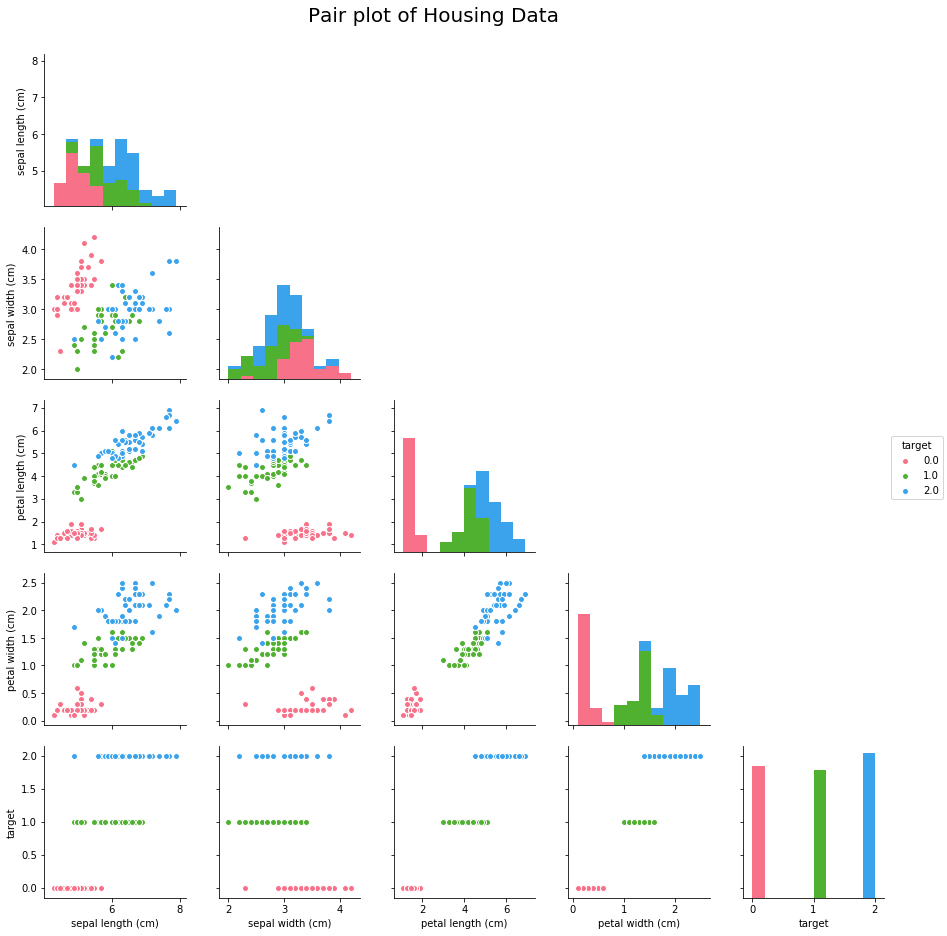

In [10]:
def scttr_matrix(df, title, diag="hist"):
    plt.figure()
    if 'target' in df.columns:
        p = sns.pairplot(data=df, hue='target', dropna=True, palette="husl", diag_kind=diag)
    else:
        p = sns.pairplot(data=df, dropna=True, palette="husl", diag_kind=diag)

    for i,j in zip(*np.triu_indices_from(p.axes,1)):
        p.axes[i, j].set_visible(False)

    p.fig.text(0.33, 1.02, "Pair plot of " + title, fontsize=20)
    plt.show()

scttr_matrix(X_train,"Housing Data")

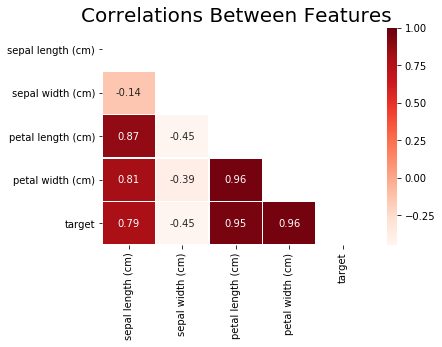

In [36]:
def make_corr_matrix(df):
    correlation = df.corr().round(2)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(correlation, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    setting = "g"
    plt.figure()
    sns.heatmap(correlation, mask=mask, annot=True, cmap='Reds', fmt=setting, linewidths=.5)
    plt.title("Correlations Between Features", fontsize=20)
    
make_corr_matrix(X_train)